In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from common.utils import EvaluationMetrics
from models.linear_regression import LinearRegressionAnalytic, LinearRegressionGradiantDecent

In [2]:
data = pd.read_csv("../data/auto-mpg.csv")
X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']].values
y = data[['mpg']].values
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


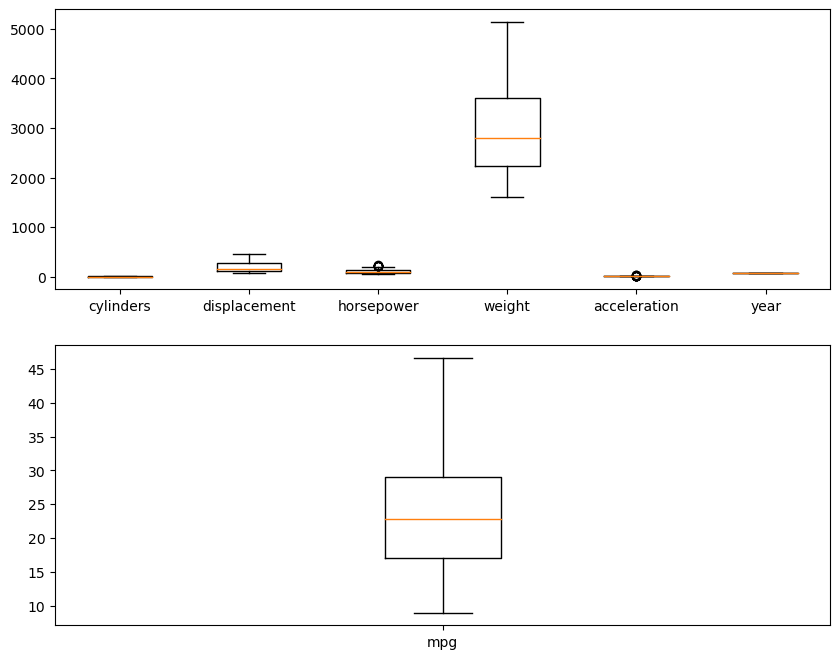

In [3]:
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
plt.boxplot(X)
plt.xticks(range(1,7), ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year'])
plt.subplot(2,1,2)
plt.boxplot(y)
plt.xticks([1], ['mpg'])
plt.show()

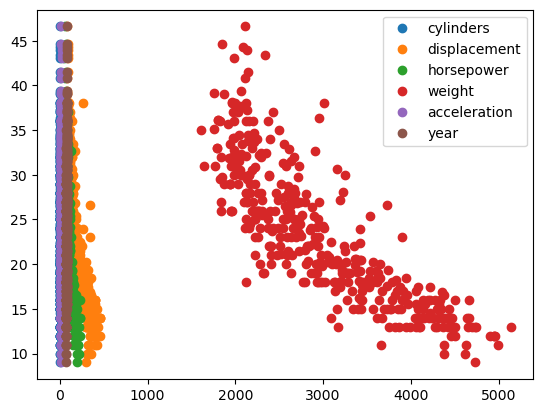

In [4]:
lineObjects = plt.plot(X, y, 'o')
plt.legend(iter(lineObjects), ('cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year'))
plt.show()

In [5]:
lr_analytic = LinearRegressionAnalytic()
lr_analytic.learn(X, y)
predicted_analytic = lr_analytic.infer(X)
EvaluationMetrics.rmse(predicted_analytic, y)

10.428353570219718

In [6]:
print("r^2: ", 1 - (np.sum((y - predicted_analytic) ** 2.) / np.sum((y - y.mean()) ** 2.)))

r^2:  -700.5848841176249


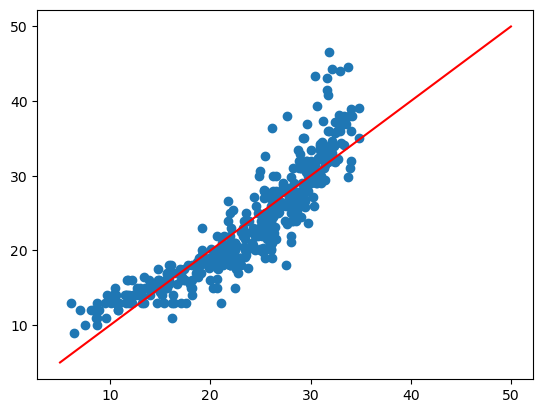

In [7]:
plt.plot(predicted_analytic, y,'o')
plt.plot(np.linspace(5,50, 2), np.linspace(5,50, 2),'-r')
plt.show()

In [8]:
lr_gradiant = LinearRegressionGradiantDecent()
lr_gradiant.learn(X, y, learning_rate=0.0001, iterations=1000)
predicted_gradiant = lr_gradiant.infer(X)
EvaluationMetrics.rmse(predicted_gradiant, y)

10.167690657403204

In [9]:
print("r^2: ",1 -  (np.sum((y-predicted_gradiant)**2.) / np.sum((y - y.mean())**2.)))

r^2:  -665.9501555446379


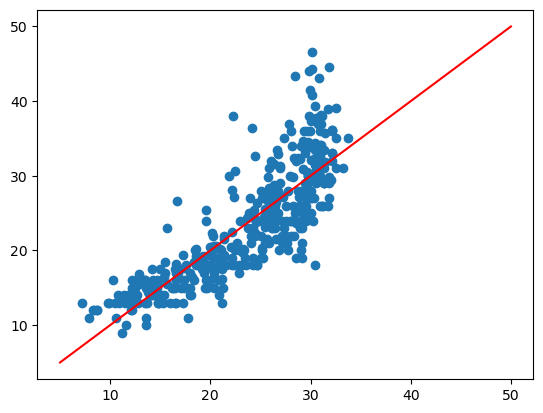

In [10]:
plt.plot(predicted_gradiant, y,'o')
plt.plot(np.linspace(5,50, 2), np.linspace(5,50, 2),'-r')
plt.show()